# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
spray = pd.read_csv("../input/spray.csv")

spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [26]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [27]:
traps = pd.read_csv("../input/train.csv")

In [28]:
# sorted(traps["Date"].unique())
traps.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [29]:
unique_dates = list(set(map(lambda x: "-".join(x.split("-",2)[:2]), traps["Date"].values)))

In [30]:
sorted(unique_dates)

['2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2009-05',
 '2009-06',
 '2009-07',
 '2009-08',
 '2009-09',
 '2009-10',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09']

In [31]:
mosquitos = traps[['Longitude', 'Latitude','NumMosquitos']]

In [32]:
west_nile = traps[traps['WnvPresent'] ==1 ][['Longitude', 'Latitude']]

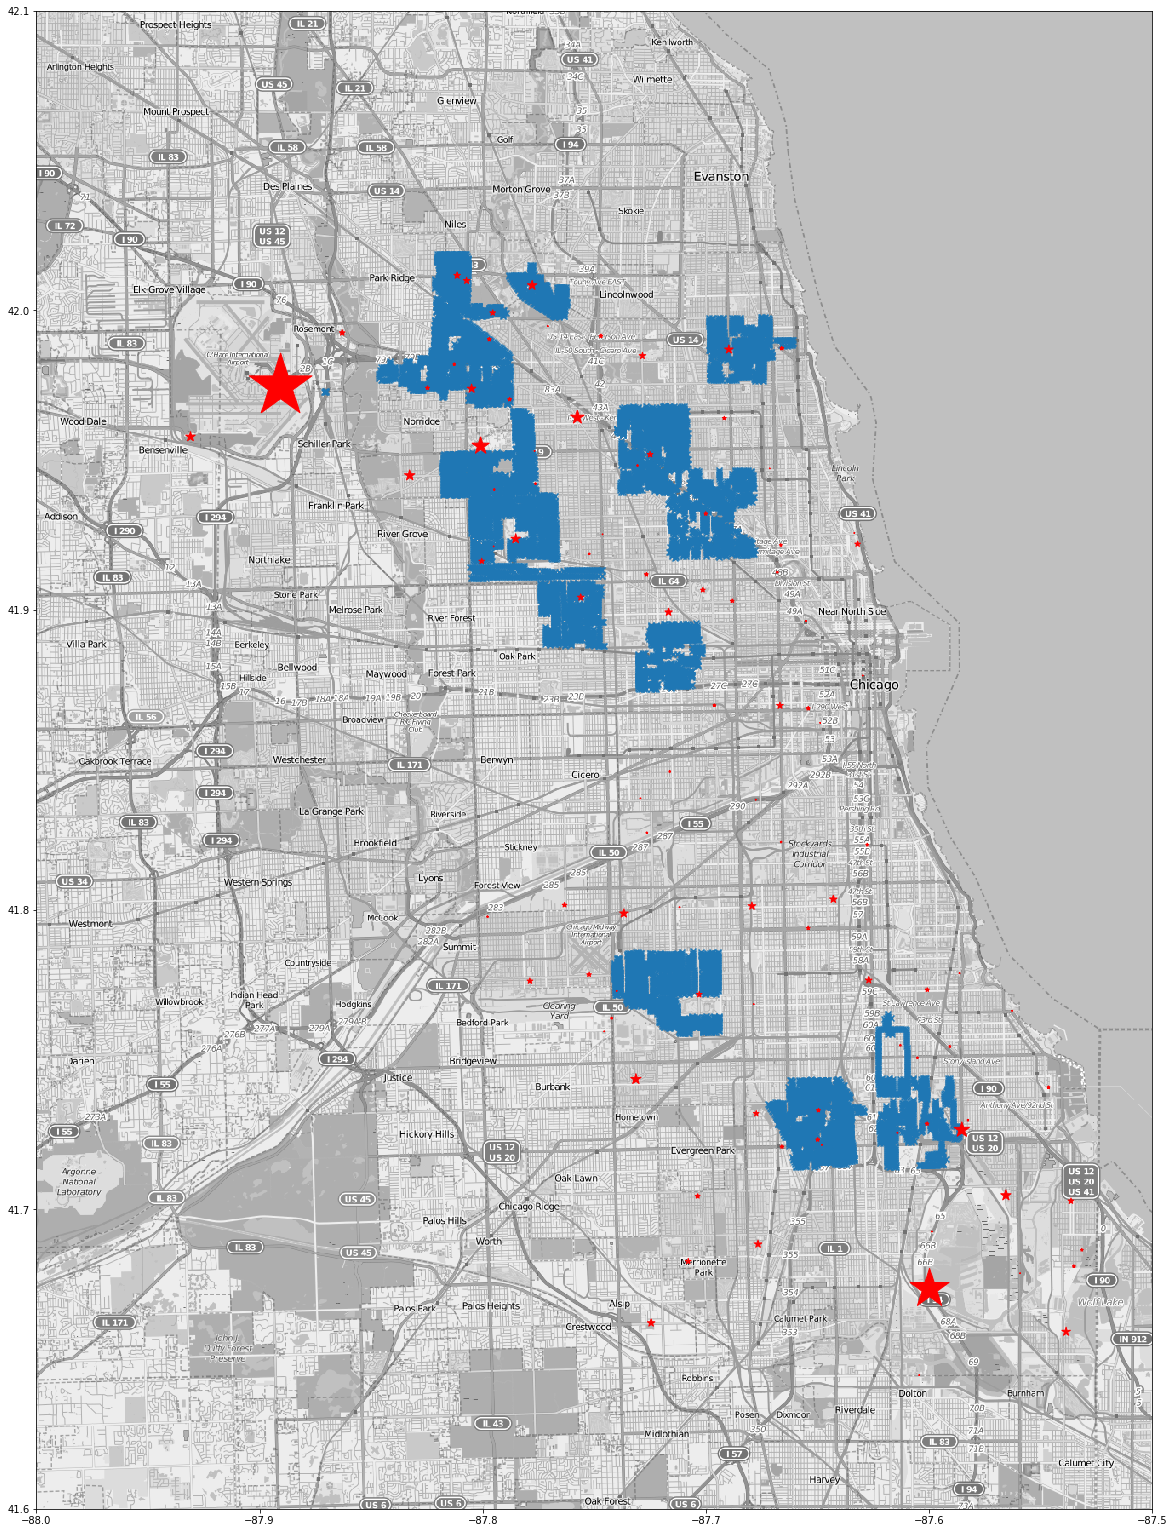

In [33]:
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,28))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


mask = (spray['Longitude'] >= -88.0)
locations = spray[mask][['Longitude', 'Latitude']].drop_duplicates().values

# https://stackoverflow.com/a/30244979/2548452
west_nile["Counts"] = traps[traps['WnvPresent'] == 1].groupby(['Longitude', 'Latitude'])['WnvPresent'].transform("sum")

wnp = west_nile.drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(wnp[:,0], wnp[:,1], marker='*', color="red", s=wnp[:,2]**2)


In [34]:
wnp[:,2]

array([ 3., 41., 18.,  4.,  8.,  6.,  7.,  8.,  4., 10.,  2.,  5.,  3.,
        8., 16.,  6.,  3.,  6., 11.,  7.,  1.,  4.,  4., 11.,  3.,  3.,
        4.,  1.,  3.,  5.,  1.,  1.,  2.,  6., 14.,  4.,  4.,  1.,  8.,
        6.,  2.,  9.,  6.,  9.,  4.,  6.,  1.,  1.,  4.,  2.,  4.,  4.,
        1.,  2.,  1.,  2.,  2.,  5.,  4.,  2.,  2.,  9.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  5., 11.,  2.,  6., 66., 10.,  7.,  6., 10.,
        9.,  7.,  2.,  4.,  8.,  4.,  6.,  1.,  4.,  4.,  1.,  7.,  3.,
        7.,  1.,  2.,  1.,  1.,  1.,  2.,  1.])

In [35]:
mosquitos["Counts"] = traps[traps['WnvPresent'] == 1].groupby(['Longitude', 'Latitude'])['WnvPresent'].transform("sum")
mosquitos_ = mosquitos.drop_duplicates().values

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
mosquitos.columns

Index(['Longitude', 'Latitude', 'NumMosquitos', 'Counts'], dtype='object')

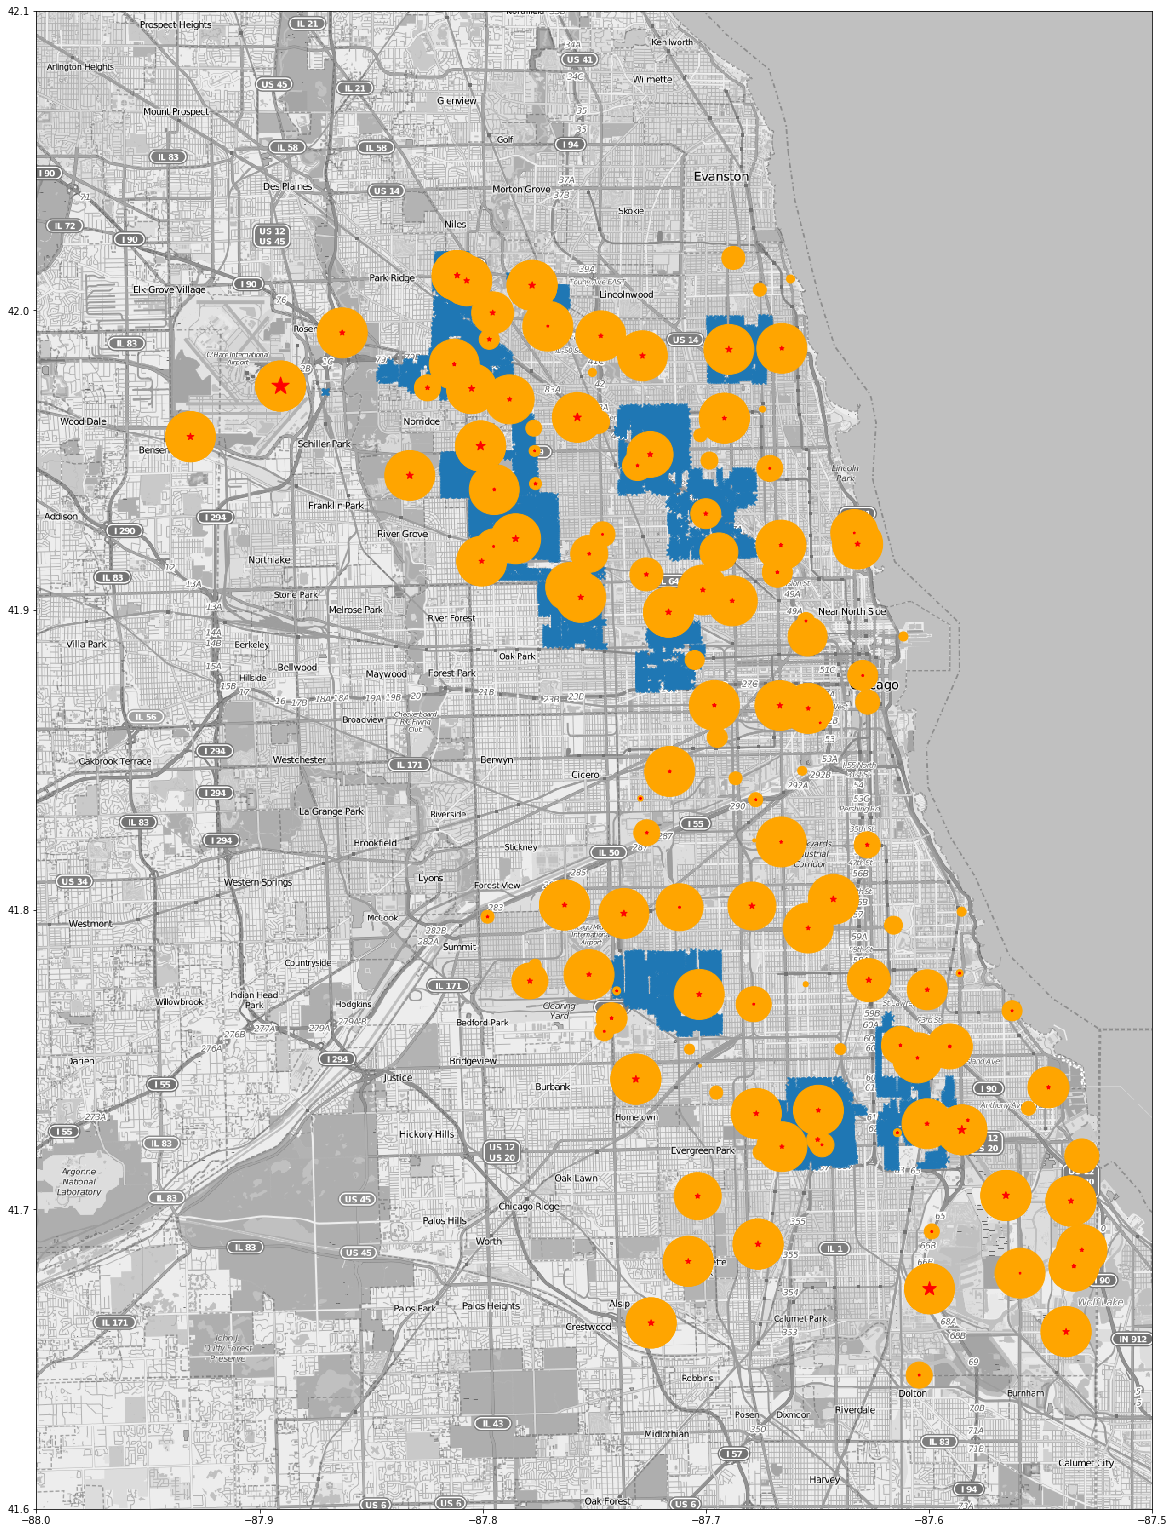

In [37]:
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,28))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


mask = (spray['Longitude'] >= -88.0)
locations = spray[mask][['Longitude', 'Latitude']].drop_duplicates().values

# https://stackoverflow.com/a/30244979/2548452

plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(mosquitos_[:,0], mosquitos_[:,1], marker='o', color="orange", s=mosquitos_[:,2]**2)
plt.scatter(wnp[:,0], wnp[:,1], marker='*', color="red", s=wnp[:,2]*5)




In [38]:
spray['date_time'] = spray['Date'] +" "+ spray['Time']
dts = spray.drop(columns=["Date","Time"])
dts['date_time'] = pd.to_datetime(dts['date_time'])
dts.set_index('date_time',inplace=True)

In [39]:
print(dts.min())
print(dts.max())
print()
print(dts.min() + ((dts.max() - dts.min())/.75))

Latitude     41.713925
Longitude   -88.096468
dtype: float64
Latitude     42.395983
Longitude   -87.586727
dtype: float64

Latitude     42.623336
Longitude   -87.416813
dtype: float64


In [40]:
traps['Date'] = pd.to_datetime(traps['Date'])

In [41]:
dt_traps = traps.set_index('Date')

In [42]:
dt_traps[dt_traps['NumMosquitos'] == 50]

Address  \
Date                                                            
2007-07-11     2200 West 113th Street, Chicago, IL 60643, USA   
2007-07-11     2200 West 113th Street, Chicago, IL 60643, USA   
2007-07-11     3500 West 116th Street, Chicago, IL 60655, USA   
2007-07-11     3500 West 116th Street, Chicago, IL 60655, USA   
2007-07-11     3500 West 116th Street, Chicago, IL 60655, USA   
2007-07-18                South Doty Avenue, Chicago, IL, USA   
2007-07-18        South Stony Island Avenue, Chicago, IL, USA   
2007-07-18        South Stony Island Avenue, Chicago, IL, USA   
2007-07-18        South Stony Island Avenue, Chicago, IL, USA   
2007-07-18          3700 118th Street, Chicago, IL 60617, USA   
2007-07-18          3700 118th Street, Chicago, IL 60617, USA   
2007-07-18     3800 East 115th Street, Chicago, IL 60617, USA   
2007-07-19        South Stony Island Avenue, Chicago, IL, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-19          3700 118th Street, Chicago, IL 60617, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
2007-07-25                South Doty Avenue, Chicago, IL, USA   
...                                                       ...   
2013-08-15  1000 North Central Park Avenue, Chicago, IL 60...   
2013-08-22    9100 West Higgins Road, Rosemont, IL 60018, USA   
2013-08-29  University of Illinois at Chicago, 1100 South ...   
2013-08-29  University of Illinois at Chicago, 1100 South ...   
2013-08-29    9100 West Higgins Road, Rosemont, IL 60018, USA   
2013-08-29    9100 West Higgins Road, Rosemont, IL 60018, USA   
2013-08-29  ORD Terminal 5, O'Hare International Airport, ...   
2013-08-29  ORD Terminal 5, O'Hare International Airport, ...   
2013-08-29  ORD Terminal 5, O'Hare International Airport, ...   
2013-08-29  ORD Terminal 5, O'Hare International Airport, ...   
2013-08-29  ORD Terminal 5, O'Hare International Airport, ...   
2013-08-29  ORD Terminal 5, O'Hare International Airport, ...   
2013-08-29   7100 North Harlem Avenue, Chicago, IL 60631, USA   
2013-08-29   7100 North Harlem Avenue, Chicago, IL 60631, USA   
2013-08-29   7100 North Harlem Avenue, Chicago, IL 60631, USA   
2013-08-29   7100 North Harlem Avenue, Chicago, IL 60631, USA   
2013-09-06  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2013-09-06    2200 North Cannon Drive, Chicago, IL 60614, USA   
2013-09-06    2200 North Cannon Drive, Chicago, IL 60614, USA   
2013-09-06  1400 North Sacramento Avenue, Chicago, IL 6062...   
2013-09-06  4500 North Campbell Avenue, Chicago, IL 60625,...   
2013-09-06   5200 South Kolmar Avenue, Chicago, IL 60632, USA   
2013-09-06  ORD Terminal 5, O'Hare International Airport, ...   
2013-09-06  ORD Terminal 5, O'Hare International Airport, ...   
2013-09-06  ORD Terminal 5, O'Hare International Airport, ...   
2013-09-12                South Doty Avenue, Chicago, IL, USA   
2013-09-12                South Doty Avenue, Chicago, IL, USA   
2013-09-12  ORD Terminal 5, O'Hare International Airport, ...   
2013-09-12  ORD Terminal 5, O'Hare International Airport, ...   
2013-09-12  ORD Terminal